# Plotting the output from Cumulative event counter

### Shortened notebook just for plotting

1. ~Load dictionary of apoptoses and their corresponding times to base the spatiotemporal scans around~ 
2. ~Load corresponding tracking data and specify scan parameters~
3. ~Iteratively calculate spatiotemporal distribution of cellular events around apoptoses, saving each distribution out as a .npy distance-time heatmap~
4. **Compile list of spatiotemporal heatmaps as cumulative heatmap**
5. ~Misc. section: comparing different experimental conditions~

In [1]:
import calculate_radial_analysis as calculate
import tools
import render

import json
import glob
import os
import re
import numpy as np
from natsort import natsorted
from tqdm import tqdm
import matplotlib.pyplot as plt
from pathlib import Path

# Automatically read parameters from input directory

In [2]:
single_cell_heatmap_location = '/home/nathan/data/results/radial_analysis_output/follow/individual_spatiotemporal_heatmaps/800.800.10/scr_div_wt_div'
analysis_info = single_cell_heatmap_location.split('individual_spatiotemporal_heatmaps/')[1]

### read params into input dict
input_dict={}
input_dict['radius'], input_dict['t_range'], input_dict['num_bins'] = list(map(int,analysis_info.split('/')[0].split('.') ))
input_dict['focal_cell'], input_dict['focal_event'], input_dict['subject_cell'], input_dict['subject_event'] = analysis_info.split('/')[1].split('_')
input_dict['save_parent_dir'] = ''#os.path.join('/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/scr_div_wt_div')
input_dict

{'radius': 800,
 't_range': 800,
 'num_bins': 10,
 'focal_cell': 'scr',
 'focal_event': 'div',
 'subject_cell': 'wt',
 'subject_event': 'div',
 'save_parent_dir': ''}

## 4) Compile individual heatmaps into cumulative plots 

Compile cumulative heatmap by iteratively adding single-apoptosis heatmaps from previous output or different pre-established output 

In [3]:
N_cells, N_events = np.zeros((input_dict['num_bins'], input_dict['num_bins'])), np.zeros((input_dict['num_bins'], input_dict['num_bins']))
N = 0
for heatmap_ID in natsorted(os.listdir(single_cell_heatmap_location)):
    ##### filter for experiment type
    expt_ID = (heatmap_ID.split('_'))[0]+'/'+(heatmap_ID.split('_'))[1]
    if expt_ID not in []:# hack to circumvent expt filter # ninety_ten:
        if 'N_cells' in heatmap_ID:
            N_cells += np.load(os.path.join(single_cell_heatmap_location,heatmap_ID))
        if 'N_events' in heatmap_ID:
            N_events += np.load(os.path.join(single_cell_heatmap_location,heatmap_ID))
            N+=1
P_events = N_events/N_cells
input_dict['N'] = N

In [4]:
print("The number of {} cells counted is equal to = ".format(input_dict['subject_cell']), N_cells.sum())

The number of wt cells counted is equal to =  42981347.0


# Plot using `input_dict` specifying only the options you want to change from the default

Default is to read the number of bins from the input shape, plot with apoptotic spatial bin, without bin labels and with International System of Units (SI) 

{'radius': 800, 't_range': 800, 'num_bins': 10, 'focal_cell': 'scr', 'focal_event': 'div', 'subject_cell': 'wt', 'subject_event': 'div', 'save_parent_dir': '', 'N': 748, 'input_type': 'N_events', 'input_2d_hist': array([[  27.,   31.,   43.,   57.,   77.,   84.,  113.,  165.,  192.,
         222.],
       [  83.,  134.,  185.,  269.,  367.,  444.,  520.,  589.,  634.,
         670.],
       [  96.,  158.,  264.,  390.,  579.,  718.,  825.,  911.,  973.,
        1083.],
       [ 140.,  197.,  330.,  475.,  730.,  900., 1036., 1182., 1258.,
        1447.],
       [ 167.,  262.,  376.,  584.,  823., 1020., 1253., 1446., 1577.,
        1661.],
       [ 186.,  298.,  445.,  645.,  945., 1132., 1401., 1550., 1679.,
        1901.],
       [ 190.,  300.,  439.,  691., 1037., 1201., 1455., 1680., 1828.,
        2076.],
       [ 166.,  330.,  456.,  709.,  994., 1260., 1540., 1709., 1761.,
        2059.],
       [ 173.,  294.,  516.,  687.,  989., 1222., 1551., 1733., 1837.,
        2100.],
    

/home/nathan/analysis/cell-comp-analysis/radial_analysis/render.py:599: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(


Plot saved at  scr_div_wt_div/Spatiotemporal dist. of wild-type divisions 
 around Scribble divisions (N=748) 800.800.10 (updated 20210906-173356).pdf


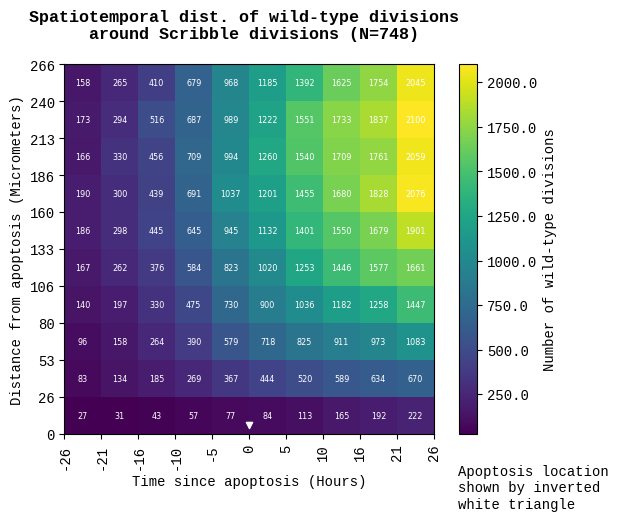

In [8]:
input_dict['input_type'] = 'N_events'
input_dict['input_2d_hist'] = N_events
# input_dict['include_apop_bin'] = True
input_dict['bin_labels'] = True
# input_dict['SI'] = True
print(input_dict)
render.auto_plot_cumulative(input_dict)
plt.show()

# Legacy method

### Set parameters

In [ ]:
#params = {}
num_bins = 10
radius = 800
t_range = 800

focal_cell = 'Scr'#'Scr'#'WT'
focal_event = 'DIVISION'#'APOPTOSIS'
subject_cell = 'WT' #'WT'
subject_event = 'DIVISION'

save_parent_dir = '/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/cumulative_plots/400.400.10/scr_div_wt_div' #'/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/cumulative_plots/scr_apop_wt_div'
single_cell_heatmap_location = '/home/nathan/data/results/radial_analysis_output/follow/scr_div_wt_div/individual_spatiotemporal_heatmaps/800.800.10/scr_div_wt_div'# '/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/individual_spatiotemporal_heatmaps/800.800.20/wt_control_wt_div'

Function to plot heatmaps: 

`render.auto_plot_cumulative_old(input_2d_hist, input_type, num_bins, radius, t_range, title, expt_label, cb_label, save_path, SI = True)`

Where the variables needed are as follows:

- `input_2d_hist` = Input 2D histogram
- `input_type` = String version of input variable name
- `num_bins` = Number of bins the histogram is sorted into
- `radius` = Spatial extent of scan
- `t_range` = Temporal range of scan
- `focal_cell` = Cell type that is the focal point of the scan 
- `focal_event` = Event type that is the focal point of the scan 
- `subject_cell` = Cell type that is scanned over
- `subject_event` = Event type that is the scanned over 
- `save_parent_dir` = Root directory into which different plots will be saved according to scan parameters, if empty then plots not saved out 
- `cbar_lim` = Tuple that is the limits of the colorbar, if left blank then will be automatically decided
- `include_apop_bin` = Boolean option to include the first spatial bin (which for 40px/13um bins usually only includes the site of apoptosis)
- `SI` = If True then plots the xy in SI base unit instead of pixel/frames

Also have an option for plotting with default text `auto_plot_cumulative_defaulttext`

In [ ]:
render.auto_plot_cumulative_old(N_events,
                     'N_events',
                      N,
                      num_bins  ,
                      radius ,
                      t_range , 
                      focal_cell, 
                      focal_event, 
                      subject_cell, 
                      subject_event, 
                      '',#save_parent_dir ,
                      '',#cbar_lim = (0, 0.0025),
                      include_apop_bin = True, 
                      bin_labels = True,      
                      SI = True)
plt.show()

In [ ]:
render.auto_plot_cumulative_old(N_cells,
                     'N_cells',
                      N,
                      num_bins  ,
                      radius ,
                      t_range , 
                      focal_cell, 
                      focal_event, 
                      subject_cell, 
                      subject_event, 
                      '',#save_parent_dir ,
                      '',#cbar_lim = (0, 0.0025),
                      include_apop_bin = True,
                      bin_labels = True,
                      SI = True)
plt.show()

In [ ]:
render.auto_plot_cumulative_old(P_events,
                     'P_events',
                      N,
                      num_bins  ,
                      radius ,
                      t_range , 
                      focal_cell, 
                      focal_event, 
                      subject_cell, 
                      subject_event,
                      '',#save_parent_dir ,
                      '',#cbar_lim = (0, 0.0025),
                      include_apop_bin = False,      
                      SI = True)

# Coarse-graining preexisting plots

crop so that there is an equal number of bins on each side of apop point (crop two bins from top so that apop spatial bin isnt excluded)

In [ ]:
N_cells_crop = N_cells[:-2,1:-1]
N_events_crop = N_events[:-2,1:-1]

In [ ]:
def coarse_array(array, coarseness):
# This function takes a coarseness factor and reshapes an array according to that. Ie. a 8x8 array with coarseness factor 2 becomes a 4x4 array with each new element the sum of the previous 4
    temp = array.reshape((array.shape[0] // coarseness, coarseness,
                                array.shape[1] // coarseness, coarseness))
    coarse_array = np.sum(temp, axis=(1,3))
    
    return coarse_array

In [ ]:
N_cells_coarse = coarse_array(N_cells_crop, 2)
N_events_coarse = coarse_array(N_events_crop, 2)

In [ ]:
P_events_coarse = N_events_coarse/N_cells_coarse

In [ ]:
save_parent_dir = '/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/'

In [ ]:
render.auto_plot_cumulative(P_events_coarse,
                     'P_events',
                      N,
                      4  ,
                      320 ,
                      320 , 
                      focal_cell, 
                      focal_event, 
                      subject_cell, 
                      subject_event, 
                      save_parent_dir ,
                      '',#cbar_lim = (0, 0.0017),
                      include_apop_bin = True,      
                      SI = True)

In [ ]:
render.auto_plot_cumulative(N_events_coarse,
                     'N_events',
                      N,
                      4  ,
                      320 ,
                      320 , 
                      focal_cell, 
                      focal_event, 
                      subject_cell, 
                      subject_event, 
                      save_parent_dir ,
                      '',#cbar_lim = (0, 0.002),
                      include_apop_bin = True,      
                      SI = True)

In [ ]:
render.auto_plot_cumulative(N_cells_coarse,
                     'N_cells',
                      N,
                      4  ,
                      320 ,
                      320 , 
                      focal_cell, 
                      focal_event, 
                      subject_cell, 
                      subject_event, 
                      save_parent_dir ,
                      '',#cbar_lim = (0, 0.002),
                      include_apop_bin = True,      
                      SI = True)

# Completely automated cumulative graph generation from single cell graph directory

In [ ]:
root_dir = '/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/individual_spatiotemporal_heatmaps/400.400.10/'
save_parent_dir = os.path.join('/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/follow/cumulative_plots/spatial_crop_cbarlim_0_0.002')

In [ ]:
list_of_graph_types = os.listdir(root_dir)

for graph_type in list_of_graph_types:
    single_cell_heatmap_location = os.path.join(root_dir,graph_type)

    analysis_info = single_cell_heatmap_location.split('individual_spatiotemporal_heatmaps/')[1]

    radius, t_range, num_bins = list(map(int,analysis_info.split('/')[0].split('.') ))

    focal_cell, focal_event , subject_cell, subject_event = analysis_info.split('/')[1].split('_')
    
    N_cells, N_events = np.zeros((num_bins, num_bins)), np.zeros((num_bins, num_bins))
    N = 0
    for heatmap_ID in natsorted(os.listdir(single_cell_heatmap_location)):
        if 'N_cells' in heatmap_ID:
            N_cells += np.load(os.path.join(single_cell_heatmap_location,heatmap_ID))
        if 'N_events' in heatmap_ID:
            N_events += np.load(os.path.join(single_cell_heatmap_location,heatmap_ID))
            N+=1
    P_events = N_events/N_cells
    
    render.auto_plot_cumulative(P_events,
                                 'P_events',
                                  N,
                                  num_bins  ,
                                  radius ,
                                  t_range , 
                                  focal_cell, 
                                  focal_event, 
                                  subject_cell, 
                                  subject_event, 
                                  save_parent_dir ,
                                  cbar_lim = (0, 0.002),
                                  include_apop_bin = False,      
                                  SI = True)
    plt.clf()
    
    render.auto_plot_cumulative(N_events,
                                 'N_events',
                                  N,
                                  num_bins  ,
                                  radius ,
                                  t_range , 
                                  focal_cell, 
                                  focal_event, 
                                  subject_cell, 
                                  subject_event, 
                                  save_parent_dir ,
                                  '',#cbar_lim = (0, 0.0025),
                                  include_apop_bin = False,      
                                  SI = True)
    plt.clf()
    
    render.auto_plot_cumulative(N_cells,
                                 'N_cells',
                                  N,
                                  num_bins  ,
                                  radius ,
                                  t_range , 
                                  focal_cell, 
                                  focal_event, 
                                  subject_cell, 
                                  subject_event, 
                                  save_parent_dir ,
                                  '',#cbar_lim = (0, 0.0025),
                                  include_apop_bin = False,      
                                  SI = True)
    plt.clf()

# New plot that shows many arrays randomly sampled from cumulative array 

In [ ]:
array1 = np.load('/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0794_Pos4_70_RFP_N_cells.npy')

In [ ]:
array2 = np.load('/home/nathan/data/kraken/h2b/giulia/radial_analysis_output/individual_spatiotemporal_heatmaps/800,20/scr_apop_wt_div/temporal_occupancy_adjusted/GV0794_Pos6_8_RFP_N_cells.npy')

In [ ]:
combined_array = array1*array2        cb = plt.colorbar(label = 'label')
        ax = cb.ax
        text = ax.yaxis.label
        font = matplotlib.font_manager.FontProperties(family='Liberation Mono')
        text.set_font_properties(font)


In [ ]:
arrays = [array1, array2]

In [ ]:
for array in arrays:
    for i in array:
        for j in i:
            if j == np.nan:
                continue
            else:
                print(j)

In [ ]:
fig = plt.figure()
a = fig.add_subplot(1, 3, 1)
imgplot = plt.imshow(array1)
a.set_title('array1')
a = fig.add_subplot(1, 3, 2)
imgplot = plt.imshow(array2)
a.set_title('array2')
a = fig.add_subplot(1, 3, 3)
imgplot = plt.imshow(combined_array)
a.set_title('combined')

In [ ]:
ninety_ten = [
# 'GV0794/Pos3',
 'GV0794/Pos8',
 #'GV0794/Pos15',
 'GV0795/Pos3',
 'GV0795/Pos8',
 'GV0795/Pos16',
 'GV0796/Pos3',
 'GV0796/Pos8',
 'GV0796/Pos19',
 'GV0796/Pos20',
 'GV0797/Pos3',
 'GV0797/Pos8',
 'GV0797/Pos18',
 #'GV0797/Pos19',
 'GV0798/Pos3',
 'GV0798/Pos8',
 'GV0798/Pos18',
 'GV0798/Pos19',
 'GV0800/Pos3',
 'GV0800/Pos8',
 'GV0800/Pos15',
 'GV0801/Pos3',
 'GV0802/Pos3',
 #'GV0804/Pos3',
 'GV0805/Pos3',
 'GV0806/Pos3',
 'GV0807/Pos3']

controls = [
# 'GV0812/Pos0',
#  'GV0812/Pos1',
#  'GV0812/Pos2',
#  'GV0812/Pos3',
#  'GV0812/Pos4',
#  'GV0812/Pos5',
 'GV0813/Pos0',
 'GV0813/Pos1',
 'GV0813/Pos2',
 'GV0813/Pos3',
 'GV0813/Pos4',
 'GV0813/Pos5',
 'GV0814/Pos0',
 'GV0814/Pos11',
 'GV0814/Pos12',
 'GV0814/Pos23',
 'GV0815/Pos0',
 'GV0815/Pos11',
 'GV0815/Pos12',
 'GV0815/Pos23',
 'GV0816/Pos0',
 'GV0816/Pos13',
 'GV0816/Pos14',
 'GV0816/Pos23',
 'GV0817/Pos0',
 'GV0817/Pos11',
 'GV0817/Pos12',
 'GV0817/Pos23',
 'GV0818/Pos12',
 'GV0818/Pos13',
 'GV0819/Pos0',
 'GV0819/Pos1',
 'GV0819/Pos2',
 'GV0819/Pos3',
 'GV0819/Pos4',
 'GV0819/Pos5',
 'GV0820/Pos0',
 'GV0820/Pos1',
 'GV0820/Pos2',
 'GV0820/Pos3',
 'GV0820/Pos4',
 'GV0820/Pos5']

ten_ninety = [
    'GV0794/Pos5',
 'GV0794/Pos6',
 'GV0795/Pos5',
 'GV0795/Pos6',
 'GV0795/Pos18',
 'GV0796/Pos5',
 'GV0796/Pos6',
 'GV0796/Pos23',
 'GV0796/Pos24',
 'GV0797/Pos5',
 'GV0797/Pos6',
 'GV0797/Pos22',
 'GV0797/Pos23',
 'GV0798/Pos5',
 'GV0798/Pos6',
 'GV0798/Pos22',
 'GV0798/Pos23',
 'GV0800/Pos5',
 'GV0800/Pos6',
 'GV0800/Pos17',
 'GV0801/Pos5',
 'GV0802/Pos5',
 'GV0804/Pos5',
 'GV0805/Pos5',
 'GV0806/Pos5',
 'GV0807/Pos5']

fifty_fifty = ['GV0794/Pos4',
 'GV0794/Pos7',
 #'GV0794/Pos16',
 'GV0795/Pos4',
 'GV0795/Pos7',
 'GV0795/Pos17',
 'GV0796/Pos4',
 'GV0796/Pos7',
 'GV0796/Pos21',
 'GV0796/Pos22',
 'GV0797/Pos4',
 'GV0797/Pos7',
 'GV0797/Pos20',
 'GV0797/Pos21',
 'GV0798/Pos4',
 'GV0798/Pos7',
 'GV0798/Pos20',
 'GV0798/Pos21',
 'GV0800/Pos4', 
 'GV0800/Pos7',
 'GV0800/Pos16',
 'GV0801/Pos4',
 'GV0802/Pos4',
 'GV0804/Pos4',
 'GV0805/Pos4',
 'GV0806/Pos4',
 'GV0807/Pos4']